In [31]:
import numpy as np 
from sympy import symbols, exp, integrate
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit, fsolve
import scipy.constants as consts
from scipy.integrate import quad



In [32]:
df_Dwinelle = pd.read_csv('Spectrum_Dwinelle_Radiation_Project.csv')
df_Etcheverry = pd.read_csv('Spectrum_Etcheverry_Radiation_Project.csv')
df_Evans = pd.read_csv('Spectrum_Evans_Radiation_Project_Full.csv')
df_Hearst = pd.read_csv('Spectrum_Hearst_Radiation_Project.csv')
df_Moffit = pd.read_csv('Spectrum_Moffitt_Radiation_Project_Full.csv')
df_Waywest = pd.read_csv('Spectrum_WayWest_Radiation_Project_Full.csv')

df_Dwinelle = df_Dwinelle.iloc[-1]
df_Etcheverry = df_Etcheverry.iloc[-1]
df_Evans = df_Evans.iloc[-1]
df_Hearst = df_Hearst.iloc[-1]
df_Moffit = df_Moffit.iloc[-1]
df_Waywest = df_Waywest.iloc[-1]

$$\text{Dwinelle}$$

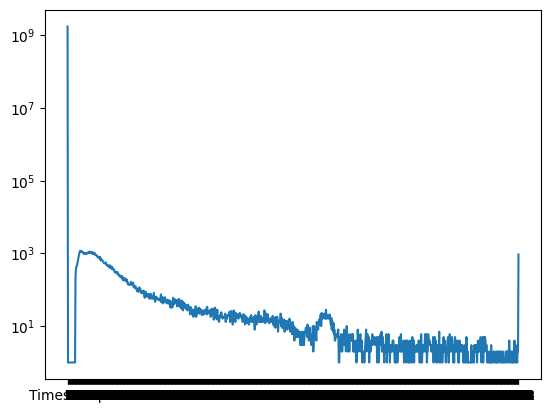

In [33]:
plt.plot(df_Dwinelle)
plt.yscale('log')

for gaussian : amplitude = 3.6317528370442305, mean = 2.000000000675578, std = 1.0852023433982971
for exponential : a = 2.198734731523216, b = -0.0460737438267473
Intersection points: [0.87021383 3.23830496]
Definite integral = -4.7389463057253 + 4.03625649684656*sqrt(pi)
Total counts for U238 is : 2.4263793430524574 = 3 counts


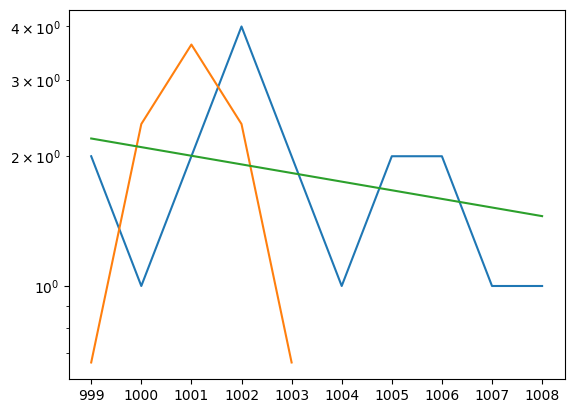

In [34]:
#Energy Peak for U238 is 1001 keV
df_Dwinelle_U238 = df_Dwinelle.iloc[1000:1010] #This chunk of data is for exponential fit
df_Dwinelle_U238_gaussian = df_Dwinelle.iloc[1001:1006] #This chunk of data is for gaussian fit
plt.plot(df_Dwinelle_U238)
plt.yscale('log')

#Gausian Fit --> Exponential Fit --> intersection --> integration
#Gaussian Fit
Dwinelle_U238_values = df_Dwinelle_U238_gaussian.values
Dwinelle_U238_values = Dwinelle_U238_values.flatten()
Dwinelle_U238_index = df_Dwinelle_U238_gaussian.index
Dwinelle_U238_index = np.arange(len(Dwinelle_U238_values))

std = np.std(df_Dwinelle_U238_gaussian.values)
mean = np.mean(df_Dwinelle_U238_gaussian.values)

def gaussian(x, amplitude, mean, std):
    return amplitude * np.exp(-((x - mean) / std) ** 2 / 2)

initial_guess = (1, mean, std)
params, covariance = curve_fit(gaussian, Dwinelle_U238_index, Dwinelle_U238_values, p0 = initial_guess)
amplitude_fit, mean_fit, stddev_fit = params


plt.plot(Dwinelle_U238_index, gaussian(Dwinelle_U238_index, amplitude_fit, mean_fit, stddev_fit))

#Exponential Fit
Dwinelle_U238_exponential_values = df_Dwinelle_U238.values
Dwinelle_U238_exponential_values = Dwinelle_U238_exponential_values.flatten()
Dwinelle_U238_exponential_index = df_Dwinelle_U238.index
Dwinelle_U238_exponential_index = np.arange(len(Dwinelle_U238_exponential_index))
def exponential_func(x, a, b):
    return a * np.exp(b * x)

params, covariance = curve_fit(exponential_func, Dwinelle_U238_exponential_index, Dwinelle_U238_exponential_values)
a, b = params
plt.plot(Dwinelle_U238_exponential_index, exponential_func(Dwinelle_U238_exponential_index, a, b))

#Intersection
print(f'for gaussian : amplitude = {amplitude_fit}, mean = {mean_fit}, std = {stddev_fit}')
print(f'for exponential : a = {a}, b = {b}')

def f(x, amplitude_fit, mean_fit, stddev_fit):
    return amplitude_fit * np.exp(-((x - mean_fit) / stddev_fit) ** 2 / 2)

def g(x, a, b):
    return a * np.exp(b * x)

def intersection(x, amplitude_fit, mean_fit, stddev_fit, a, b):
    return f(x, amplitude_fit, mean_fit, stddev_fit) - g(x, a, b)

x_values = np.linspace(-10, 10, 1000)

sign_changes = np.where(np.diff(np.sign(intersection(x_values, amplitude_fit, mean_fit, stddev_fit, a, b))) != 0)[0]

intersection_points = []
for idx in sign_changes:
    x_root = fsolve(intersection, x_values[idx], args=(amplitude_fit, mean_fit, stddev_fit, a, b))
    intersection_points.extend(x_root)

intersection_points = np.unique(intersection_points)

print("Intersection points:", intersection_points)

#Integrate
x = symbols('x')
f_gaussian = amplitude_fit * exp(-((x - mean_fit) / stddev_fit) ** 2 / 2)
f_exponential = a * exp(b * x)

lower_bound = intersection_points[0]
upper_bound = intersection_points[1]

definite_integral_gaussian = integrate(f_gaussian, (x, lower_bound, upper_bound))
definite_integral_exponential = integrate(f_exponential, (x, lower_bound, upper_bound))
definite_integral = definite_integral_gaussian - definite_integral_exponential

print(f'Definite integral = {definite_integral}')

print(f'Total counts for U238 is : {4.04260209376798 * np.sqrt(consts.pi) - 4.7389463057253} = 3 counts')


C:\Users\seanz\AppData\Local\Temp\ipykernel_22092\3572920618.py:30: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x)
C:\Users\seanz\AppData\Local\Temp\ipykernel_22092\3572920618.py:50: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  intersection_point = int(intersection_point)
C:\Users\seanz\AppData\Local\Temp\ipykernel_22092\3572920618.py:49: RuntimeWarning: The number of calls to function has reached maxfev = 400.
  intersection_point = fsolve(intersection_function, i, args=(amplitude, mean, std, a, b))


number of counts for Cs137 = 267.299288697668


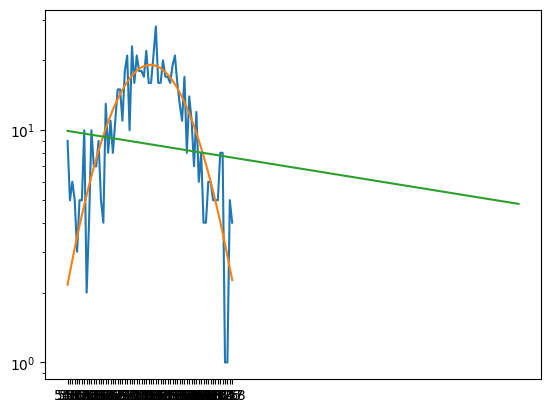

In [42]:
#Energy Peak for Cs-137 is 662 keV
df_Dwinelle_Cs137 = df_Dwinelle[510: 700] #Extra points to better fit the exponential curve
df_Dwinelle_Cs137_gaussian = df_Dwinelle[550:620] #The gaussian curve itself
plt.plot(df_Dwinelle_Cs137_gaussian)

#Gaussian Fit
Dwinelle_Cs137_gaussian_index = df_Dwinelle_Cs137_gaussian.index
Dwinelle_Cs137_gaussian_index = np.arange(len(Dwinelle_Cs137_gaussian_index))
Dwinelle_Cs137_gaussian_values = df_Dwinelle_Cs137_gaussian.values
Dwinelle_Cs137_gaussian_values = Dwinelle_Cs137_gaussian_values.flatten()

std = np.std(Dwinelle_Cs137_gaussian_values)
mean = np.mean(Dwinelle_Cs137_gaussian_values)

def gaussian(x, amplitude, mean, std):
    return amplitude * np.exp(-((x - mean) / std) ** 2 / 2)

initial_guess = (1, mean, std)
params, covariance = curve_fit(gaussian, Dwinelle_Cs137_gaussian_index, Dwinelle_Cs137_gaussian_values, p0 = initial_guess)
amplitude, mean, std = params

plt.plot(Dwinelle_Cs137_gaussian_index, gaussian(Dwinelle_Cs137_gaussian_index, amplitude, mean, std))

#Exponential Fit
Dwinelle_Cs137_index = df_Dwinelle_Cs137.index
Dwinelle_Cs137_index = np.arange(len(Dwinelle_Cs137_index))
Dwinelle_Cs137_values = df_Dwinelle_Cs137.values
Dwinelle_Cs137_values = Dwinelle_Cs137_values.flatten()
def exponential_func2(x, a, b):
    return a * np.exp(-b * x)

params, covariance = curve_fit(exponential_func2, Dwinelle_Cs137_index, Dwinelle_Cs137_values)
a, b = params
plt.plot(Dwinelle_Cs137_index, exponential_func2(Dwinelle_Cs137_index, a, b))
plt.yscale('log')

#Intersection
def f(x, amplitude, mean, std):
    return amplitude * np.exp(-((x - mean) / std) ** 2 / 2)

def g(x, a, b):
    return a * np.exp(-b * x)

def intersection_function(x, amplitude, mean, std, a, b):
    return gaussian(x, amplitude, mean, std) - exponential_func2(x, a, b)

intersection_points = []
for i in range(len(Dwinelle_Cs137_index)):
    intersection_point = fsolve(intersection_function, i, args=(amplitude, mean, std, a, b))
    intersection_point = int(intersection_point)
    intersection_points.append(intersection_point)

intersection_points = np.array(intersection_points)
intersection_points = intersection_points[intersection_points < 100]
intersection_points = np.unique(intersection_points)

#Integration
x = symbols('x')
f_gaussian = amplitude * exp(-((x - mean) / std) ** 2 / 2)
f_exponential = a * exp(-b * x)

lower_bound = intersection_points[0]
upper_bound = intersection_points[1]

#definite_integral_gaussian = integrate(f_gaussian, (x, lower_bound, upper_bound))  Integral is unsolvable. 
definite_integral_exponential = integrate(f_exponential, (x, lower_bound, upper_bound))
#definite_integral = definite_integral_gaussian - definite_integral_exponential

def integrand(x):
    return np.exp(0.125786623123295 * x) * np.exp(-0.00181337453702553 * x**2)

result, error = quad(integrand, lower_bound, upper_bound)

# Multiply the result by the constant and subtract the other constant
definite_integral = 2.16175471677203 * result - definite_integral_exponential

print(f'number of counts for Cs137 = {definite_integral}')

$$\text{Etcheverry}$$

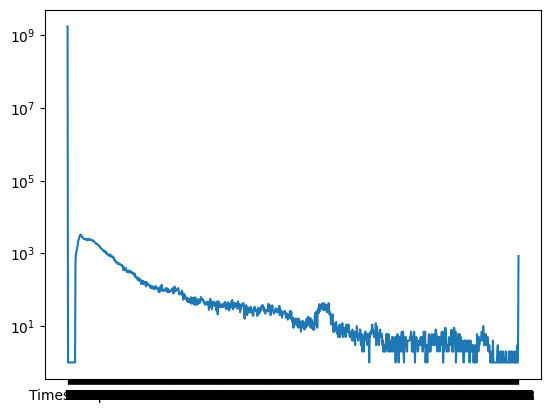

In [37]:
plt.plot(df_Etcheverry)
plt.yscale('log')